**House Price Prediction using Linear Regression**


**Objective**

The primary objective of this project is to develop a machine learning model that can accurately predict house prices based on various features such as location, area, number of bedrooms, and amenities. This will involve data preprocessing, exploratory data analysis (EDA), visualizations, model building using Linear Regression, and evaluating the model's performance.

Importing Libraries

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Loading the Dataset

In [22]:
df = pd.read_csv("/content/Housing.csv")

Data Exploration

How Does The Data Look Like

In [23]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [24]:
df.sample(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
107,6125000,6420,3,1,3,yes,no,yes,no,no,0,yes,unfurnished
34,8120000,6840,5,1,2,yes,yes,yes,no,yes,1,no,furnished
117,5950000,3700,4,1,2,yes,yes,no,no,yes,0,no,furnished
455,3129000,5495,3,1,1,yes,no,yes,no,no,0,no,unfurnished
83,6580000,6000,3,2,4,yes,no,no,no,yes,0,no,semi-furnished
478,2940000,3600,3,1,2,no,no,no,no,no,1,no,unfurnished
69,6790000,12090,4,2,2,yes,no,no,no,no,2,yes,furnished
431,3290000,3180,4,1,2,yes,no,yes,no,yes,0,no,unfurnished
333,3920000,3000,3,1,2,yes,no,no,no,no,0,no,semi-furnished
54,7350000,6000,3,2,2,yes,yes,no,no,yes,1,no,semi-furnished


How Big Is The Data

In [25]:
df.shape

(545, 13)

What is the data types of cols?

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


Are There Any Missing Value

In [27]:
(df.isnull()).sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


How Does The Data Look Mathematically

In [28]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


Are There Duplicate Values

In [29]:
(df.duplicated()).sum()

np.int64(0)

How Is The Correlation Between Cols

In [30]:
for column in df.select_dtypes(include=['object']).columns:
    df[column] = df[column].map({'yes': 1, 'no': 0})

# Now calculate the correlation
df.corr()['price']

,price
price,1.000000
area,0.535997
bedrooms,0.366494
bathrooms,0.517545
stories,0.420712
mainroad,0.296898
guestroom,0.255517
basement,0.187057
hotwaterheating,0.093073
airconditioning,0.452954


In [31]:
from sklearn.preprocessing import LabelEncoder

Encoding Categorical Variables

Machine learning models like Linear Regression require all input features to be numerical. However, the dataset contains categorical columns (like mainroad, guestroom, furnishingstatus, etc.) with string values such as "yes"/"no" or "furnished"/"unfurnished". These need to be converted into numerical form for the model to understand and process them effectively.

In [32]:
categorical_cols = [
    'mainroad', 'guestroom', 'basement',
    'hotwaterheating', 'airconditioning',
    'prefarea', 'furnishingstatus'
]

# Initialize LabelEncoder and convert string into integer
label_encoder = LabelEncoder()

# Encode each categorical column as integers
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Check the types to confirm all are numeric
print(df.dtypes)

# Optional: save the encoded dataframe
df.to_csv("Housing_encoded.csv", index=False)

price               int64
area                int64
bedrooms            int64
bathrooms           int64
stories             int64
mainroad            int64
guestroom           int64
basement            int64
hotwaterheating     int64
airconditioning     int64
parking             int64
prefarea            int64
furnishingstatus    int64
dtype: object


Univariate Analysis

Categorical Data

<Axes: xlabel='bedrooms'>

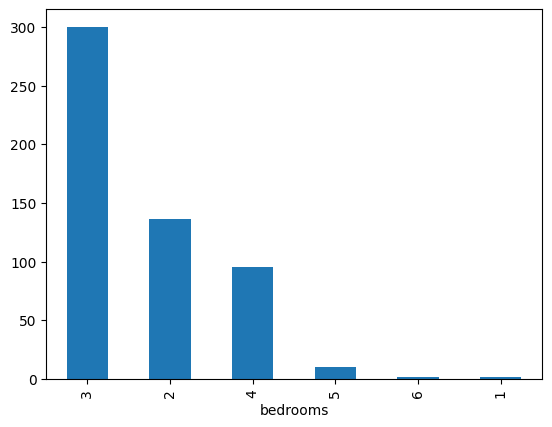

In [33]:
df['bedrooms'].value_counts().plot(kind='bar')

<Axes: xlabel='bathrooms'>

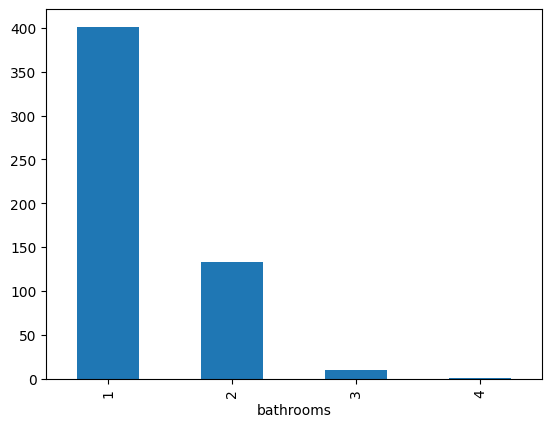

In [34]:
df['bathrooms'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

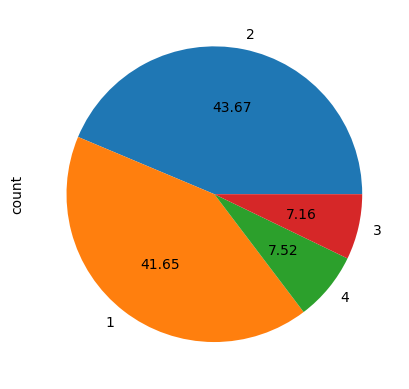

In [35]:
df['stories'].value_counts().plot(kind='pie',autopct = "%.2f")

<Axes: ylabel='count'>

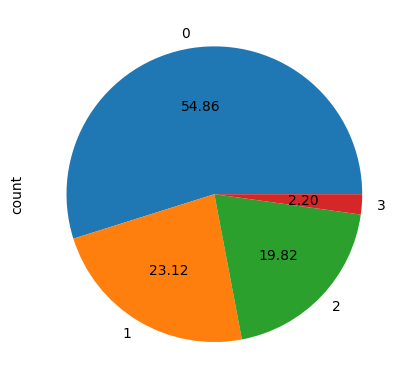

In [36]:
df['parking'].value_counts().plot(kind='pie',autopct = "%.2f")

Numerical Data

(array([ 61., 163., 139.,  89.,  46.,  25.,  13.,   4.,   1.,   4.]),
 array([ 1750000.,  2905000.,  4060000.,  5215000.,  6370000.,  7525000.,
         8680000.,  9835000., 10990000., 12145000., 13300000.]),
 <BarContainer object of 10 artists>)

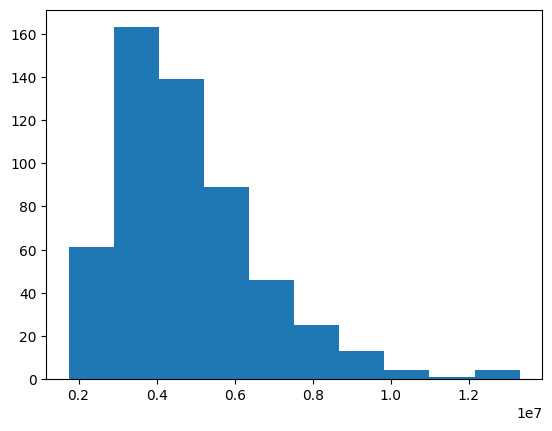

In [37]:
plt.hist(df['price'],bins=10)

<ipython-input-38-e045d1b00126>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])


<Axes: xlabel='area', ylabel='Density'>

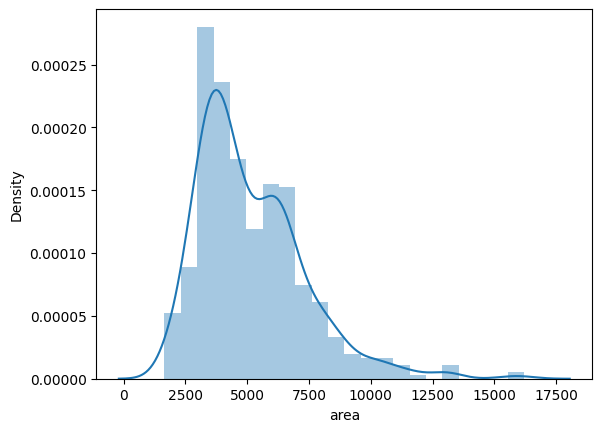

In [38]:
sns.distplot(df['area'])

<Axes: ylabel='price'>

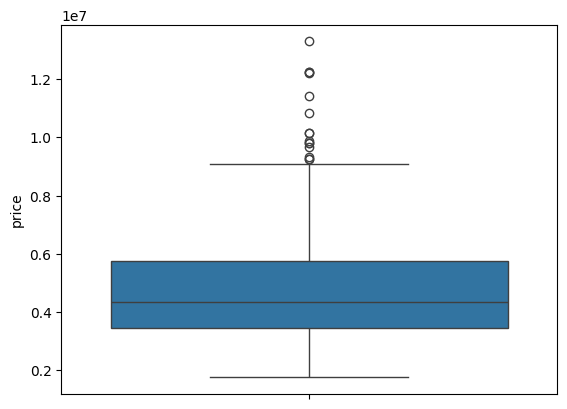

In [39]:
sns.boxplot(df['price'])

<Axes: ylabel='area'>

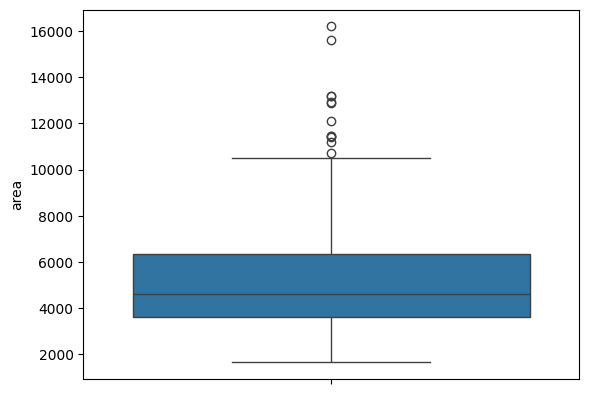

In [40]:
sns.boxplot(df['area'])

In [41]:
df['price'].min()

1750000

In [42]:
df['price'].max()

13300000

In [43]:
df['area'].min()

1650

In [44]:
df['area'].max()

16200

Bivariate Analysis

<Axes: xlabel='bedrooms', ylabel='price'>

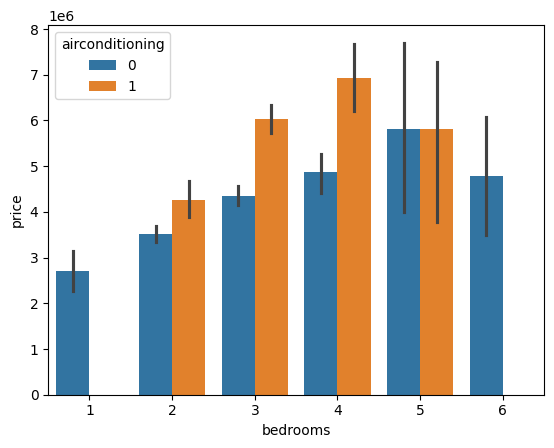

In [45]:
sns.barplot(data=df , x='bedrooms' , y='price' ,hue='airconditioning')

<Axes: xlabel='price', ylabel='area'>

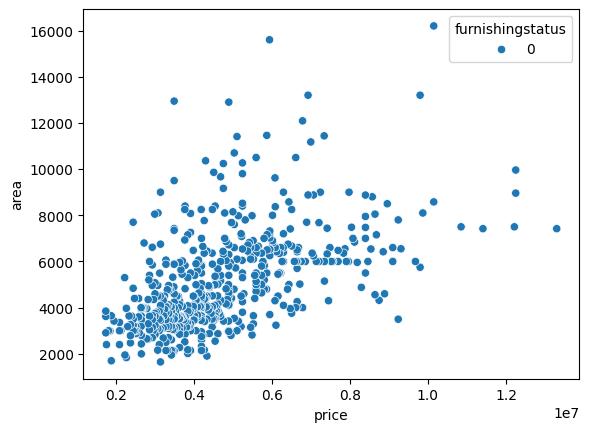

In [46]:
sns.scatterplot(data=df,x='price',y='area',hue='furnishingstatus')

<Axes: xlabel='bathrooms', ylabel='price'>

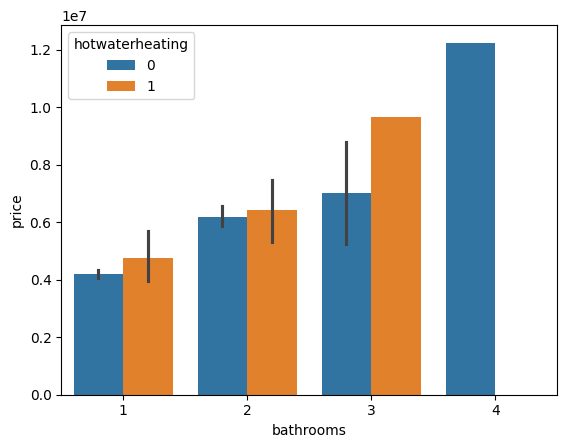

In [47]:
sns.barplot(data=df , x='bathrooms' , y='price',hue='hotwaterheating' )

In [48]:
df['price'].describe()

,price
count,5.450000e+02
mean,4.766729e+06
std,1.870440e+06
min,1.750000e+06
25%,3.430000e+06
50%,4.340000e+06
75%,5.740000e+06
max,1.330000e+07


In [49]:
q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

In [50]:
print("Upper limit",upper_bound)
print("Lower limit",lower_bound)

Upper limit 9205000.0
Lower limit -35000.0


Finding Outliers of price

In [51]:
df[df['price'] > upper_bound]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
5,10850000,7500,3,3,1,1,0,1,0,1,2,1,0
6,10150000,8580,4,3,4,1,0,0,0,1,2,1,0
7,10150000,16200,5,3,2,1,0,0,0,0,0,0,0
8,9870000,8100,4,1,2,1,1,1,0,1,2,1,0
9,9800000,5750,3,2,4,1,1,0,0,1,1,1,0


In [52]:
df[df['price'] < lower_bound]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus


Trimming

In [53]:
new_df = df[(df['price'] < upper_bound) & (df['price'] > lower_bound)]

In [54]:
df.shape

(545, 13)

In [55]:
new_df.shape

(530, 13)

<ipython-input-56-1cc9fdf3ea24>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])
<ipython-input-56-1cc9fdf3ea24>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['price'])


<Axes: xlabel='price', ylabel='Density'>

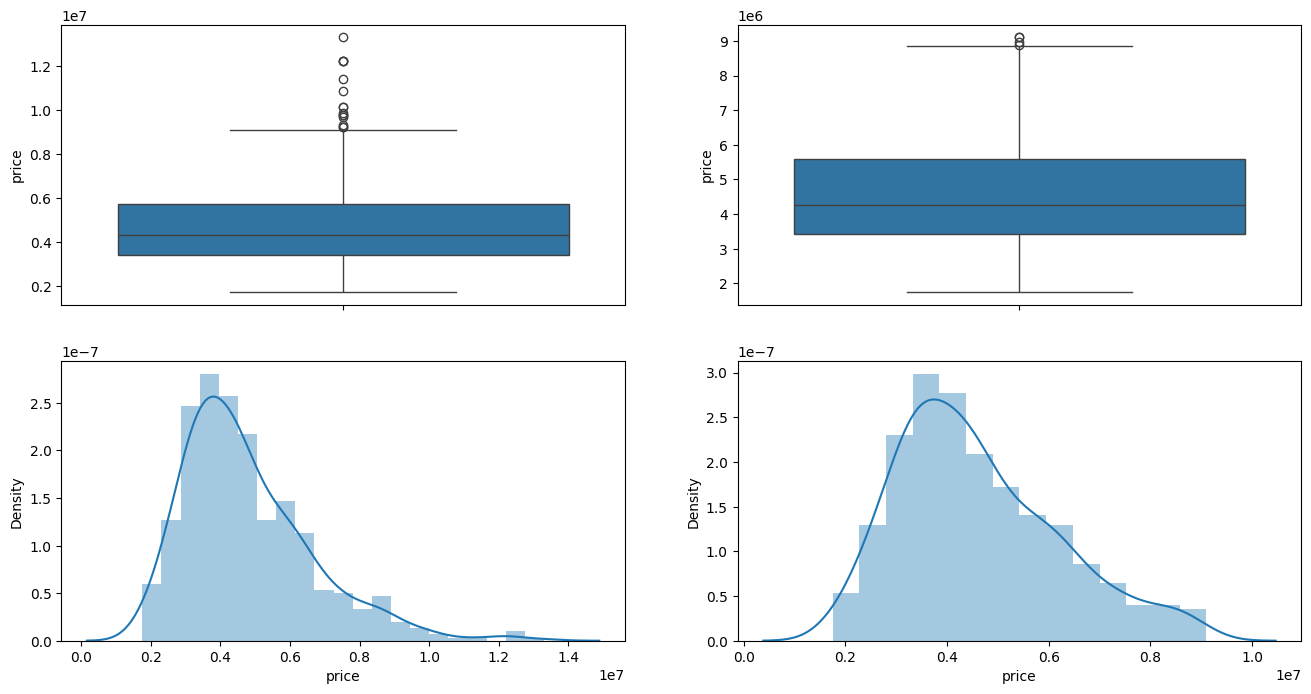

In [56]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.boxplot(df['price'])

plt.subplot(2,2,2)
sns.boxplot(new_df['price'])

plt.subplot(2,2,3)
sns.distplot(df['price'])

plt.subplot(2,2,4)
sns.distplot(new_df['price'])

Capping

In [57]:
df_cap = df.copy()
df_cap['price'] = np.where(df_cap['price'] > upper_bound,upper_bound,
                        np.where(df_cap['price'] < lower_bound,lower_bound,df_cap['price']))

In [58]:
df_cap.shape

(545, 13)

In [59]:
df_cap.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


<Axes: ylabel='price'>

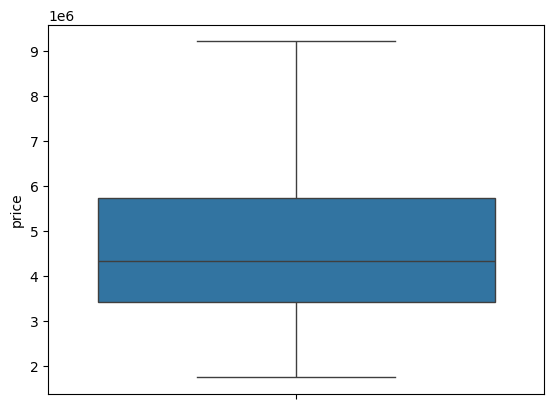

In [60]:
sns.boxplot(df_cap['price'])

In [61]:
df_cap['price'].describe()

,price
count,5.450000e+02
mean,4.727388e+06
std,1.745227e+06
min,1.750000e+06
25%,3.430000e+06
50%,4.340000e+06
75%,5.740000e+06
max,9.205000e+06


In [62]:
df['price'].describe()

,price
count,5.450000e+02
mean,4.766729e+06
std,1.870440e+06
min,1.750000e+06
25%,3.430000e+06
50%,4.340000e+06
75%,5.740000e+06
max,1.330000e+07


<Axes: xlabel='area'>

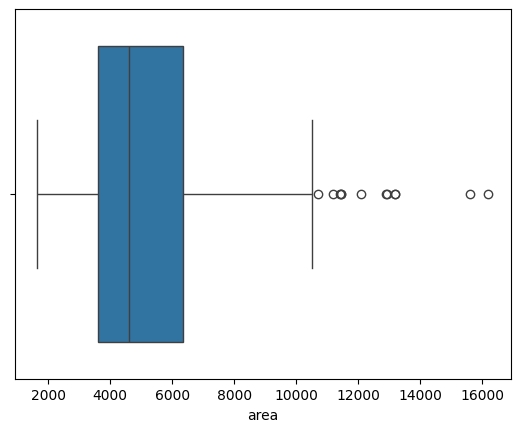

In [63]:
sns.boxplot(data=df_cap,x='area')

In [64]:
Q1 = df_cap['area'].quantile(0.25)
Q3 = df_cap['area'].quantile(0.75)
IQR = Q3 - Q1

In [65]:
upper_fence = Q3 + 1.5 * IQR
lower_fence = Q1 - 1.5 * IQR

In [66]:
upper_fence

np.float64(10500.0)

In [67]:
lower_fence

np.float64(-540.0)

Finding Outliers of Area

In [68]:
new_df_cap = df_cap[df_cap['area'] > upper_fence]
new_df_cap

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
7,9205000.0,16200,5,3,2,1,0,0,0,0,0,0,0
10,9205000.0,13200,3,1,2,1,0,1,0,1,2,1,0
56,7343000.0,11440,4,1,2,1,0,1,0,0,1,1,0
64,7000000.0,11175,3,1,1,1,0,1,0,1,1,1,0
66,6930000.0,13200,2,1,1,1,0,1,1,0,1,0,0
69,6790000.0,12090,4,2,2,1,0,0,0,0,2,1,0
125,5943000.0,15600,3,1,1,1,0,0,0,1,2,0,0
129,5873000.0,11460,3,1,3,1,0,0,0,0,2,1,0
186,5110000.0,11410,2,1,2,1,0,0,0,0,0,1,0
191,5040000.0,10700,3,1,2,1,1,1,0,0,0,0,0


Capping

In [69]:
new_df_capping = df_cap.copy()
new_df_capping['area'] = np.where(new_df_capping['area'] > upper_fence,upper_fence,
                        np.where(new_df_capping['area'] < lower_fence,lower_fence,new_df_capping['area']))

<ipython-input-70-5dcb22753818>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cap['area'])
<ipython-input-70-5dcb22753818>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df_capping['area'])


<Axes: xlabel='area', ylabel='Density'>

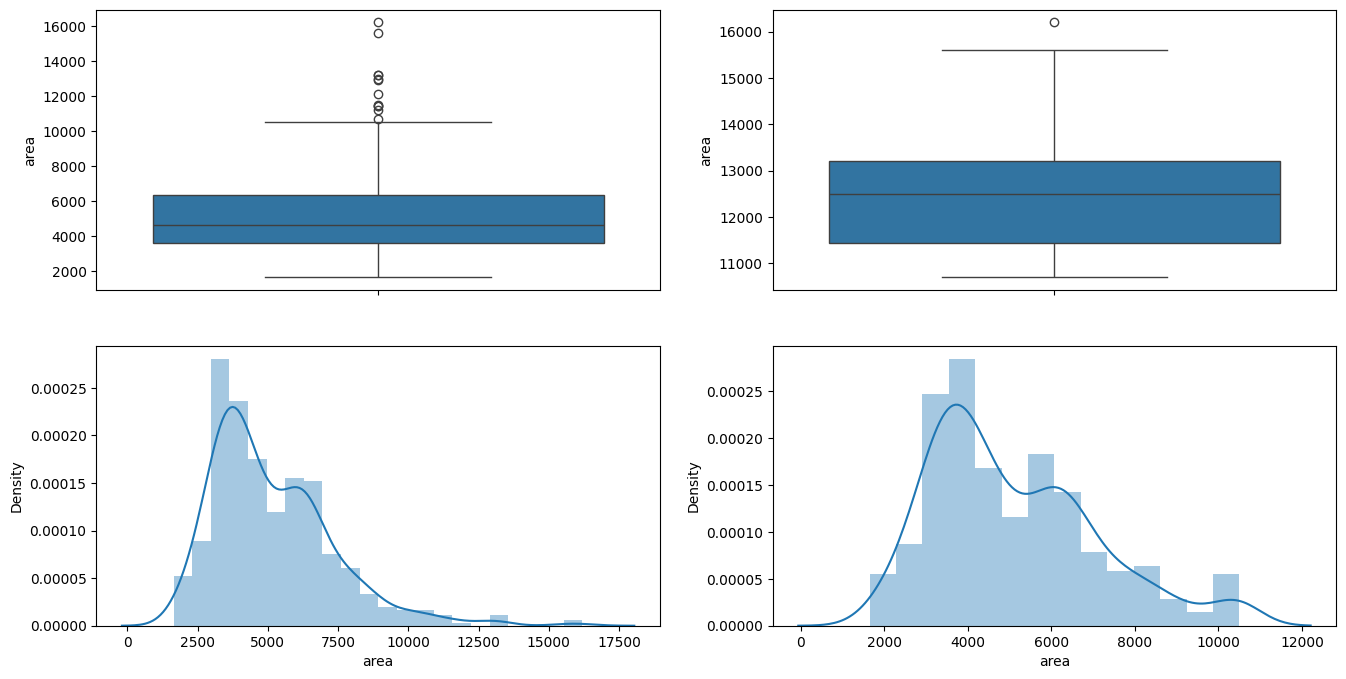

In [70]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.boxplot(df_cap['area'])

plt.subplot(2,2,2)
sns.boxplot(new_df_cap['area'])

plt.subplot(2,2,3)
sns.distplot(df_cap['area'])

plt.subplot(2,2,4)
sns.distplot(new_df_capping['area'])


In [71]:
new_df_capping.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [72]:
new_df_capping.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,9205000.0,7420.0,4,2,3,1,0,0,0,1,2,1,0
1,9205000.0,8960.0,4,4,4,1,0,0,0,1,3,0,0
2,9205000.0,9960.0,3,2,2,1,0,1,0,0,2,1,0
3,9205000.0,7500.0,4,2,2,1,0,1,0,1,3,1,0
4,9205000.0,7420.0,4,1,2,1,1,1,0,1,2,0,0


Dependent Column

In [87]:
y = new_df_capping.iloc[:,:-12]
y

,price
0,9205000.0
1,9205000.0
2,9205000.0
3,9205000.0
4,9205000.0
...,...
540,1820000.0
541,1767150.0
542,1750000.0
543,1750000.0


Independent Column

In [91]:
X = new_df_capping.iloc[:,1:13]
X

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420.0,4,2,3,1,0,0,0,1,2,1,0
1,8960.0,4,4,4,1,0,0,0,1,3,0,0
2,9960.0,3,2,2,1,0,1,0,0,2,1,0
3,7500.0,4,2,2,1,0,1,0,1,3,1,0
4,7420.0,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000.0,2,1,1,1,0,1,0,0,2,0,0
541,2400.0,3,1,1,0,0,0,0,0,0,0,0
542,3620.0,2,1,1,1,0,0,0,0,0,0,0
543,2910.0,3,1,1,0,0,0,0,0,0,0,0


In [90]:
new_df_capping.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,9205000.0,7420.0,4,2,3,1,0,0,0,1,2,1,0
1,9205000.0,8960.0,4,4,4,1,0,0,0,1,3,0,0
2,9205000.0,9960.0,3,2,2,1,0,1,0,0,2,1,0
3,9205000.0,7500.0,4,2,2,1,0,1,0,1,3,1,0
4,9205000.0,7420.0,4,1,2,1,1,1,0,1,2,0,0


Train/Test Split

In [95]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [96]:
X_train

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
272,4075.0,3,1,1,1,1,1,0,0,2,0,0
40,6550.0,3,1,2,1,0,1,0,1,0,1,0
326,4100.0,4,1,1,0,0,1,0,0,0,0,0
441,4370.0,3,1,2,1,0,0,0,0,0,0,0
511,3180.0,3,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
129,10500.0,3,1,3,1,0,0,0,0,2,1,0
144,4700.0,4,1,2,1,1,1,0,1,1,0,0
72,5020.0,3,1,4,1,0,0,0,1,0,1,0
235,5680.0,3,1,2,1,1,0,0,1,1,0,0


In [97]:
X_test

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
62,6240.0,4,2,2,1,0,0,0,1,1,0,0
247,8400.0,4,1,4,1,0,0,0,0,3,0,0
142,10500.0,4,2,2,1,0,0,0,0,1,0,0
107,6420.0,3,1,3,1,0,1,0,0,0,1,0
483,6615.0,3,1,2,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
201,4095.0,3,1,2,0,1,1,0,1,0,0,0
92,4800.0,3,2,4,1,1,0,0,1,0,0,0
66,10500.0,2,1,1,1,0,1,1,0,1,0,0
284,7770.0,2,1,1,1,0,0,0,0,1,0,0


In [98]:
y_train

,price
272,4340000.0
40,7875000.0
326,3990000.0
441,3220000.0
511,2520000.0
...,...
129,5873000.0
144,5600000.0
72,6720000.0
235,4620000.0


In [99]:
y_test

,price
62,7070000.0
247,4550000.0
142,5600000.0
107,6125000.0
483,2940000.0
...,...
201,4900000.0
92,6405000.0
66,6930000.0
284,4270000.0


Model Building

In [100]:
from sklearn.linear_model import LinearRegression

In [101]:
Lr = LinearRegression()

Model Training

In [102]:
Lr.fit(X_train,y_train)

LinearRegression()

Predictions

In [105]:
y_ped=Lr.predict(X_test)
y_ped

array([[6107953.29515597],
       [6414796.23664016],
       [6454291.28762729],
       [5661047.11270643],
       [4216488.65206172],
       [2894510.11684067],
       [2937341.92521933],
       [7088794.19545311],
       [2175070.09922987],
       [4508984.81640855],
       [3964884.72345863],
       [3895512.17776473],
       [4931029.93454067],
       [4715928.53866013],
       [5418592.30007622],
       [7647268.67252601],
       [4210009.87651455],
       [3474170.59939779],
       [6696793.67851155],
       [2906344.85169288],
       [4541979.00794498],
       [5123235.3866365 ],
       [5274356.58684638],
       [3356474.11393054],
       [5012599.47312923],
       [7217676.06339341],
       [2983946.62564229],
       [7093841.79448591],
       [7753986.80796074],
       [4156835.01397099],
       [7269468.96319656],
       [6311499.03441903],
       [5052775.00992046],
       [4737765.36686812],
       [6262461.21162832],
       [4607349.18288856],
       [6307938.10479615],
 

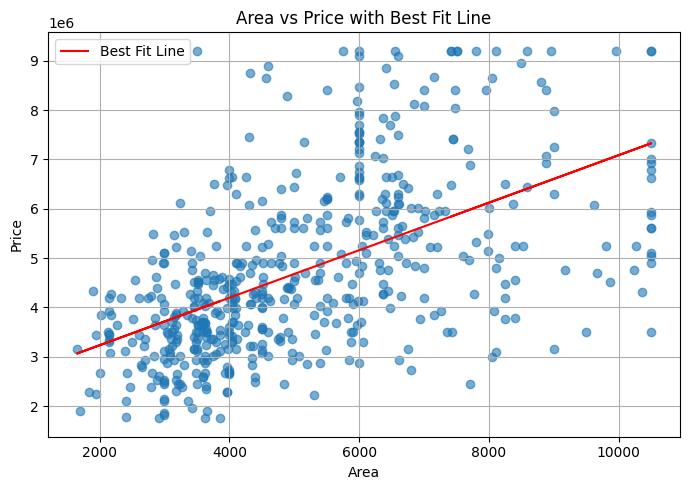

In [106]:
x = new_df_capping['area']
y = new_df_capping['price']

# Calculate best fit line
slope, intercept = np.polyfit(x, y, 1)
best_fit_line = slope * x + intercept

# Plot
plt.figure(figsize=(7, 5))
plt.scatter(x, y, alpha=0.6)
plt.plot(x, best_fit_line, color='red', label='Best Fit Line')
plt.title('Area vs Price with Best Fit Line')
plt.xlabel('Area')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
plt.scatter(new_df_capping['price'],new_df_capping['area'])
plt.plot(X_test,Lr.predict(X_test),color='red')

In [107]:
y_test

,price
62,7070000.0
247,4550000.0
142,5600000.0
107,6125000.0
483,2940000.0
...,...
201,4900000.0
92,6405000.0
66,6930000.0
284,4270000.0


In [108]:
X_test

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
62,6240.0,4,2,2,1,0,0,0,1,1,0,0
247,8400.0,4,1,4,1,0,0,0,0,3,0,0
142,10500.0,4,2,2,1,0,0,0,0,1,0,0
107,6420.0,3,1,3,1,0,1,0,0,0,1,0
483,6615.0,3,1,2,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
201,4095.0,3,1,2,0,1,1,0,1,0,0,0
92,4800.0,3,2,4,1,1,0,0,1,0,0,0
66,10500.0,2,1,1,1,0,1,1,0,1,0,0
284,7770.0,2,1,1,1,0,0,0,0,1,0,0


In [109]:
sl = Lr.coef_
sl

array([[2.41525201e+02, 1.23429896e+05, 9.41695704e+05, 4.70350158e+05,
        5.02067337e+05, 3.97496588e+05, 4.71691864e+05, 9.86241640e+05,
        6.82559364e+05, 2.34351629e+05, 5.49613852e+05, 0.00000000e+00]])

In [110]:
intercept = Lr.intercept_
intercept

array([-135953.5976409])

In [111]:
# y = slope*x + intercept

price = (sl @ X_test.iloc[0].values) + intercept
price

array([6107953.29515597])

Accuracy

In [112]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [113]:
y_test.values

array([[7070000.],
       [4550000.],
       [5600000.],
       [6125000.],
       [2940000.],
       [3780000.],
       [2450000.],
       [7490000.],
       [2940000.],
       [6440000.],
       [2800000.],
       [3325000.],
       [5810000.],
       [5950000.],
       [6895000.],
       [9205000.],
       [3640000.],
       [2870000.],
       [5460000.],
       [1890000.],
       [3780000.],
       [5600000.],
       [2660000.],
       [3640000.],
       [2590000.],
       [5250000.],
       [2450000.],
       [6930000.],
       [9205000.],
       [3430000.],
       [7840000.],
       [5950000.],
       [3430000.],
       [2940000.],
       [6090000.],
       [4620000.],
       [4543000.],
       [3220000.],
       [5810000.],
       [4760000.],
       [3360000.],
       [2940000.],
       [2450000.],
       [4382000.],
       [8120000.],
       [4865000.],
       [4200000.],
       [4200000.],
       [3290000.],
       [3115000.],
       [5215000.],
       [4473000.],
       [3115

In [114]:
print('MAE',mean_absolute_error(y_test,y_ped))
print('MSE',mean_squared_error(y_test,y_ped))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_ped)))
print('R2 Score',r2_score(y_test,y_ped))

MAE 848780.4561762251
MSE 1151931204416.9536
RMSE 1073280.5804713666
R2 Score 0.6477051046250402


In [115]:
r2 = r2_score(y_test,y_ped)

In [116]:
X_test.shape

(109, 12)

In [117]:
1 - ((1-r2)*(109-1))/(109-12-1)

0.6036682427031701